<a href="https://colab.research.google.com/github/anacarolcarrascoconsultorias-lab/IBM-Data-Science-Assignments/blob/main/Lab_14_Finding_Outliers_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA.
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [ ]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


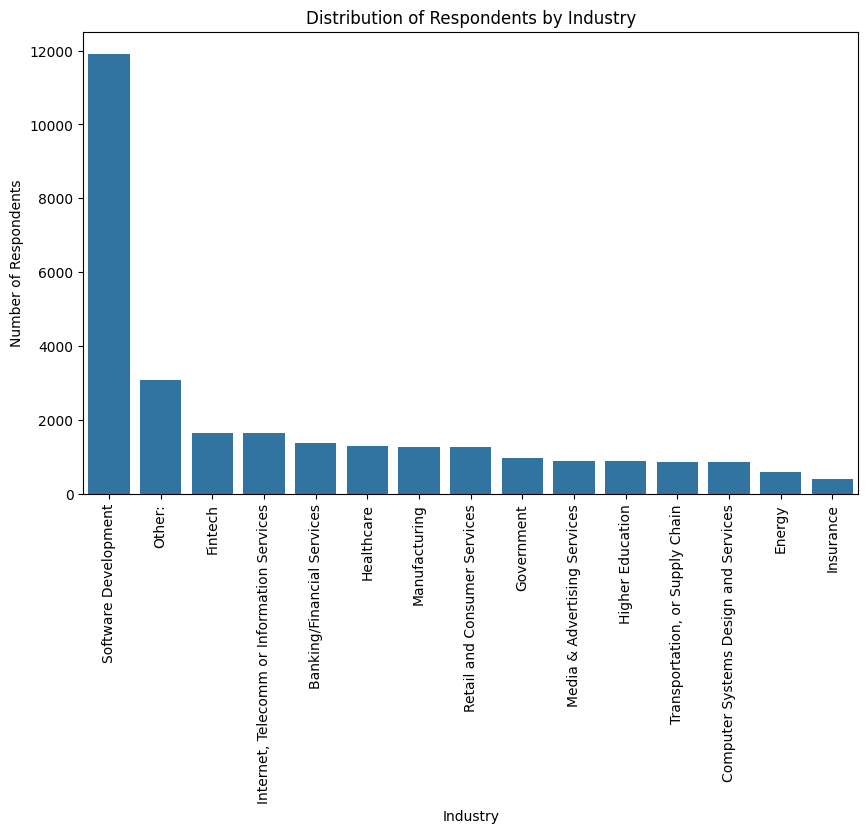

In [ ]:
##Write your code here
df_clean = df.copy()

# Step 2 - Distribution of Industry
plt.figure(figsize=(10, 6))
industry_counts = df_clean['Industry'].value_counts()
sns.countplot(
    data=df_clean,
    x='Industry',
    order=industry_counts.index
)
plt.xticks(rotation=90)
plt.xlabel('Industry')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Respondents by Industry')
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [ ]:
##Write your code here
# Step 3
# Column = numeric
df_clean['ConvertedCompYearly'] = pd.to_numeric(df_clean['ConvertedCompYearly'], errors='coerce')

comp = df_clean['ConvertedCompYearly'].dropna()
mean_comp = comp.mean()
median_comp = comp.median()
std_comp = comp.std()

print("Mean compensation:", mean_comp)
print("Median compensation:", median_comp)
print("Std deviation:", std_comp)

Mean compensation: 86155.28726264134
Median compensation: 65000.0
Std deviation: 186756.9730862951


In [ ]:
# Define threshold: mean + 3 * std
high_threshold = mean_comp + 3 * std_comp
print("High outlier threshold (mean + 3 * std):", high_threshold)

# Identify high outliers
high_outliers = df[df['ConvertedCompYearly'] > high_threshold]
print("Number of respondents with high compensation outliers:", len(high_outliers))
high_outliers[['ConvertedCompYearly']].head()

High outlier threshold (mean + 3 * std): 646426.2065215267
Number of respondents with high compensation outliers: 89


,ConvertedCompYearly
529,650000.0
828,1000000.0
1932,945000.0
2171,750000.0
2187,2000000.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1: 32712.0
Q3: 107971.5
IQR: 75259.5
Lower bound: -80177.25
Upper bound: 220860.75
Number of outliers (IQR method): 978


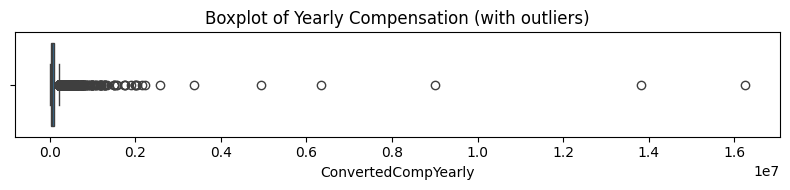

In [ ]:
# Step 4: IQR-based outliers for ConvertedCompYearly

comp = df['ConvertedCompYearly'].dropna()

Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Q1:", Q1)
print("Q3:", Q3)
print("IQR:", IQR)
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)

# Boolean mask for outliers (align with original df)
outlier_mask = (df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)

print("Number of outliers (IQR method):", outlier_mask.sum())

# Visualize with a boxplot
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['ConvertedCompYearly'])
plt.title("Boxplot of Yearly Compensation (with outliers)")
plt.tight_layout()
plt.show()


<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [ ]:
##Write your code here
# Step 5: Remove outliers and create a new DataFrame

# Recalculate in case you're in a new cell
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
comp = df['ConvertedCompYearly'].dropna()

Q1 = comp.quantile(0.25)
Q3 = comp.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Keep only non-outlier rows
non_outlier_mask = (df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)

df_no_outliers = df[non_outlier_mask].copy()

print("Original number of rows:", len(df))
print("Number of rows after removing outliers:", len(df_no_outliers))
print("Number of rows removed:", len(df) - len(df_no_outliers))



Original number of rows: 65437
Number of rows after removing outliers: 22457
Number of rows removed: 42980


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


                 Age  AgeNum
72   18-24 years old    21.0
374  25-34 years old    29.5
379  35-44 years old    39.5
385  35-44 years old    39.5
389  25-34 years old    29.5

Correlation of AgeNum with other numeric variables:
AgeNum                 1.000000
WorkExp                0.844999
ConvertedCompYearly    0.369810
JobSat                 0.067124
CompTotal             -0.021359
JobSatPoints_1        -0.038959
ResponseId            -0.040561
JobSatPoints_6        -0.051346
JobSatPoints_8        -0.051488
JobSatPoints_4        -0.070039
JobSatPoints_7        -0.083416
JobSatPoints_9        -0.083847
JobSatPoints_5        -0.096770
JobSatPoints_11       -0.106611
JobSatPoints_10       -0.111667
Name: AgeNum, dtype: float64


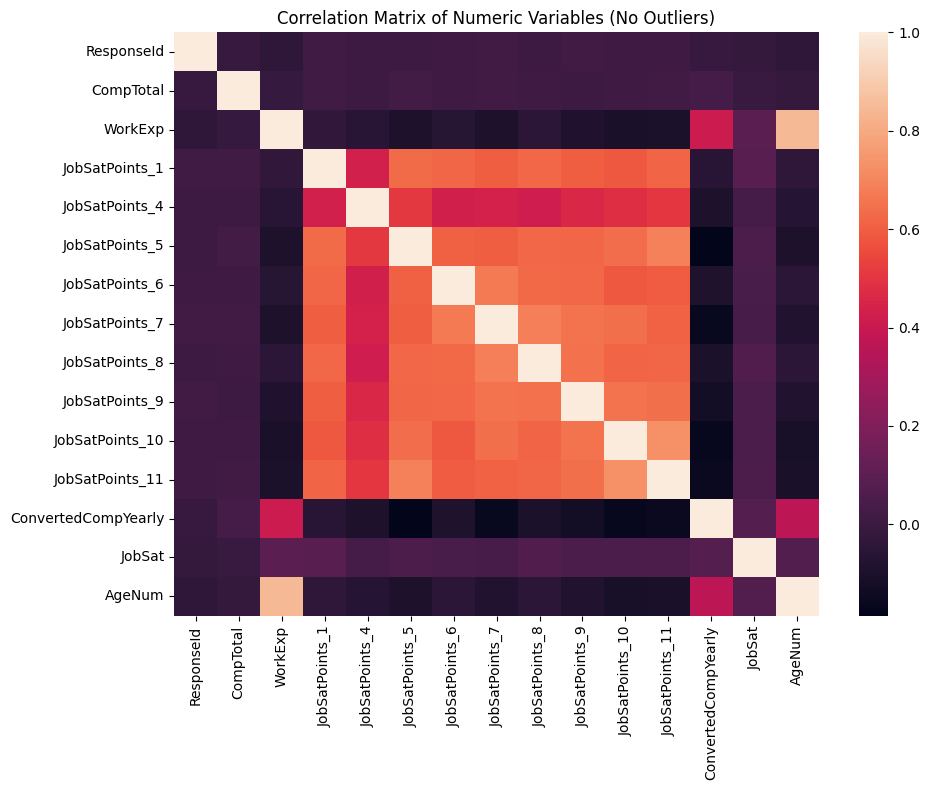

In [ ]:
##Write your code here
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

# Step 6: Correlation analysis with Age (numeric)

# 1. Map Age to numbers
age_map = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}

df_no_outliers['AgeNum'] = df_no_outliers['Age'].map(age_map)

# Check if mapping worked
print(df_no_outliers[['Age', 'AgeNum']].head())

# 2. Select only numeric columns
numeric_df = df_no_outliers.select_dtypes(include=['int64', 'float64'])

# 3. Compute correlation matrix
corr_matrix = numeric_df.corr()

# 4. Look specifically at correlations with AgeNum
print("\nCorrelation of AgeNum with other numeric variables:")
print(corr_matrix['AgeNum'].sort_values(ascending=False))

# 5. Visualize the full correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False)
plt.title("Correlation Matrix of Numeric Variables (No Outliers)")
plt.tight_layout()
plt.show()


<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
